In [1]:
from GA.SimulatedAnnealing import SimulatedAnnealing

In [2]:
kwargs = {
    'cnn_model_path': '../../Models/CNN_6_1_2.keras',
    'masked_sequence': 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG',
    # 'seed': 0,
    'target_expression': 1,
}

sa = SimulatedAnnealing(
    **kwargs,
)
best_sequence, best_prediction, best_error = sa.run()

print(best_sequence)
print(best_prediction)
print(best_error)

Instructions for updating:
Use tf.identity with explicit device placement instead.


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\rsore\Documents\GitHub\promoter-sequence-transcription-rates\v2\Testing GA\GA_deap\GA\CNN.py:61: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  tensor_sequences = torch.tensor(


AATACTAGAGGTCTTCCGACAGTCTATTATATTATAATTGTATTTACCGCGTGTGGGCGGGAAGACAACTAGGGG
0.7143042
0.28569579124450684


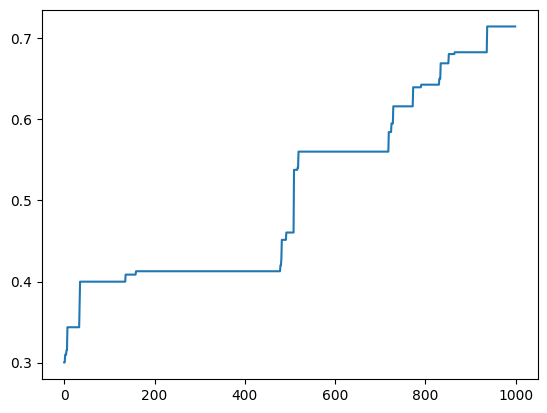

In [4]:
data = sa.prediction_history

# plot the prediction history over time
import matplotlib.pyplot as plt
plt.plot(data)
plt.show()


In [ ]:
from GA.TestGeneticAlgorithm import GeneticAlgorithm

In [2]:
kwargs = {
    'cnn_model_path': '../../Models/CNN_6_1_2.keras',
    'masked_sequence': 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG',
    'seed': 0,
    'target_expression': 1,
}
ga = GeneticAlgorithm(
    **kwargs
)
ga.run()
print(ga.best_sequences)
print(ga.best_fitnesses)
print(ga.best_predictions)

Instructions for updating:
Use tf.identity with explicit device placement instead.


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\rsore\Documents\GitHub\promoter-sequence-transcription-rates\v2\Testing GA\GA_deap\GA\CNN.py:61: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  tensor_sequences = torch.tensor(


No improvement found. Stopping early.
Best sequence: AATACTAGAGGTCTTCCGACTTGACTCCAGNNAAATTTNTTATAATAATAGTGTGGGCGGGAAGACAACTAGGGG
Best prediction: 0.8048275113105774
Best error: 0.1951724886894226
